In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Seed 고정

In [3]:
train_df = pd.read_csv('C:\\VSC\\LGAimers_Hackathon\\dataset\\train.csv')
test_df = pd.read_csv('C:\\VSC\\LGAimers_Hackathon\\dataset\\test.csv')

In [4]:
train_df[0:15]

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
5,TRAIN_005,2,0.537833,2022-06-13 5:55,T050307,A_31,NaN,NaN,NaN,NaN,...,38.16,51.25,56.01,37.41,71.37,NaN,NaN,NaN,NaN,NaN
6,TRAIN_006,1,0.533665,2022-06-13 6:03,T050304,A_31,NaN,NaN,NaN,NaN,...,32.50,41.42,38.36,30.83,76.93,NaN,NaN,NaN,NaN,NaN
7,TRAIN_007,2,0.540003,2022-06-13 6:11,T050307,A_31,NaN,NaN,NaN,NaN,...,39.00,35.95,59.51,30.49,72.77,NaN,NaN,NaN,NaN,NaN
8,TRAIN_008,1,0.531821,2022-06-13 6:19,T050304,A_31,NaN,NaN,NaN,NaN,...,42.25,43.17,55.60,33.26,78.50,NaN,NaN,NaN,NaN,NaN
9,TRAIN_009,2,0.538049,2022-06-13 6:28,T050307,A_31,NaN,NaN,NaN,NaN,...,34.40,35.88,50.36,38.45,71.42,NaN,NaN,NaN,NaN,NaN


## train_df EDA_1
- `Y_Quality` : `Y_CLASS`를 참고해서 범위 탐색
- `TIMESTAMP` : datetime으로 변환
- `PRODUCT_CODE` : `A`, `T`, `O`만 남기기

In [5]:
# Y_Quality
a = train_df.loc[(train_df.Y_Class == 0)]
b = train_df.loc[(train_df.Y_Class == 1)]
c = train_df.loc[(train_df.Y_Class == 2)]
a_len = len(a.Y_Quality)
b_len = len(b.Y_Quality)
c_len = len(c.Y_Quality)
print("-- 0, 1, 2 Length --\n{}, {}, {}".format(a_len, b_len, c_len))

-- 0, 1, 2 Length --
88, 407, 103


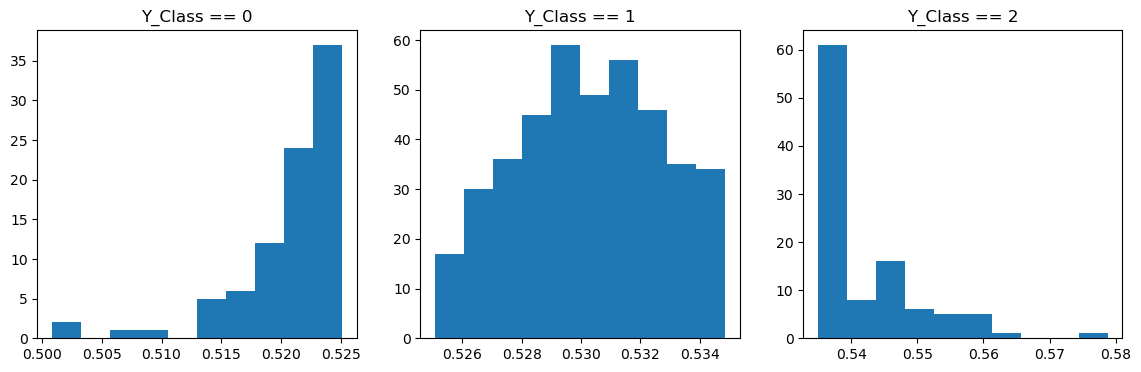

In [6]:
a_Q = a.Y_Quality
b_Q = b.Y_Quality
c_Q = c.Y_Quality
Qn = [a_Q, b_Q, c_Q]
tit = ["Y_Class == 0", "Y_Class == 1", "Y_Class == 2"]
plt.figure(figsize=(14, 4))
for i, Q_n in enumerate(Qn):
    num = 131 + i
    plt.subplot(num)
    plt.hist(Q_n)
    plt.title(tit[i])
plt.subplots_adjust(hspace=0.3)
plt.show()

In [7]:
a = a_Q.min()
b = a_Q.max()
c = b_Q.min()
d = b_Q.max()
e = c_Q.min()
f = c_Q.max()
print("Y_Class 0 일 때 Y_Quality min : {}\nY_Class 0 일 때 Y_Quality max : {}\n\nY_Class 1 일 때 Y_Quality min : {}\nY_Class 1 일 때 Y_Quality max : {}\n\nY_Class 2 일 때 Y_Quality min : {}\nY_Class 2 일 때 Y_Quality max : {}".format(a, b, c, d, e, f))

Y_Class 0 일 때 Y_Quality min : 0.500855556
Y_Class 0 일 때 Y_Quality max : 0.525066667

Y_Class 1 일 때 Y_Quality min : 0.525085714
Y_Class 1 일 때 Y_Quality max : 0.534842857

Y_Class 2 일 때 Y_Quality min : 0.534950794
Y_Class 2 일 때 Y_Quality max : 0.57884127


In [8]:
# TIMESTAMP
train_df.TIMESTAMP = train_df.TIMESTAMP.apply(lambda x : pd.to_datetime(str(x), format='%Y-%m-%d %H:%M:%S'))

# PRODUCT_CODE
train_df.PRODUCT_CODE = train_df.PRODUCT_CODE.str.split('_').str[0]

In [9]:
train_df[["Y_Class", "Y_Quality", "TIMESTAMP", "LINE", "PRODUCT_CODE"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Y_Class       598 non-null    int64         
 1   Y_Quality     598 non-null    float64       
 2   TIMESTAMP     598 non-null    datetime64[ns]
 3   LINE          598 non-null    object        
 4   PRODUCT_CODE  598 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 23.5+ KB


## train_df EDA_2
- `PRODUCT_CODE`, `Y_CLASS`에 따른 `LINE` 탐색

In [10]:
A0 = train_df.loc[(train_df.PRODUCT_CODE == "A") & (train_df.Y_Class == 0)].LINE.value_counts()
A1 = train_df.loc[(train_df.PRODUCT_CODE == "A") & (train_df.Y_Class == 1)].LINE.value_counts()
A2 = train_df.loc[(train_df.PRODUCT_CODE == "A") & (train_df.Y_Class == 2)].LINE.value_counts()

T0 = train_df.loc[(train_df.PRODUCT_CODE == "T") & (train_df.Y_Class == 0)].LINE.value_counts()
T1 = train_df.loc[(train_df.PRODUCT_CODE == "T") & (train_df.Y_Class == 1)].LINE.value_counts()
T2 = train_df.loc[(train_df.PRODUCT_CODE == "T") & (train_df.Y_Class == 2)].LINE.value_counts()

O0 = train_df.loc[(train_df.PRODUCT_CODE == "O") & (train_df.Y_Class == 0)].LINE.value_counts()
O1 = train_df.loc[(train_df.PRODUCT_CODE == "O") & (train_df.Y_Class == 1)].LINE.value_counts()
O2 = train_df.loc[(train_df.PRODUCT_CODE == "O") & (train_df.Y_Class == 2)].LINE.value_counts()

In [11]:
print("## A ##\n\n-- Y_Class 0 --\n{}\n\n-- Y_Class 1 --\n{}\n\n-- Y_Class 2 --\n{}".format(A0, A1, A2))

## A ##

-- Y_Class 0 --
T050304    30
T010305    13
T050307    11
T010306     6
Name: LINE, dtype: int64

-- Y_Class 1 --
T050304    37
T010306    37
T010305    35
T050307     9
Name: LINE, dtype: int64

-- Y_Class 2 --
T010306    27
T050307    22
T050304    11
T010305    11
Name: LINE, dtype: int64


In [12]:
print("## T ##\n\n-- Y_Class 0 --\n{}\n\n-- Y_Class 1 --\n{}\n\n-- Y_Class 2 --\n{}".format(T0, T1, T2))

## T ##

-- Y_Class 0 --
T100304    17
T100306    11
Name: LINE, dtype: int64

-- Y_Class 1 --
T100306    144
T100304    141
Name: LINE, dtype: int64

-- Y_Class 2 --
T100306    16
T100304    14
Name: LINE, dtype: int64


In [13]:
print("## O ##\n\n-- Y_Class 0 --\n{}\n\n-- Y_Class 1 --\n{}\n\n-- Y_Class 2 --\n{}".format(O0, O1, O2))

## O ##

-- Y_Class 0 --
Series([], Name: LINE, dtype: int64)

-- Y_Class 1 --
T100304    3
T100306    1
Name: LINE, dtype: int64

-- Y_Class 2 --
T100306    2
Name: LINE, dtype: int64


## train_df EDA_3
- `PRODUCT_CODE`, `LINE`을 합쳐서 새로운 컬럼 만들기
    - Ex. PRODUCT_CODE "A"에 따른 LINE "T050304" : "A050304"

In [14]:
train_df.insert(5, "LINE_2", train_df.LINE)
train_df.LINE_2 = train_df.LINE_2.str.replace("T", "")

train_df.CODE_LINE = train_df.PRODUCT_CODE + train_df.LINE_2
train_df.insert(7, "CODE_LINE", train_df.CODE_LINE)
train_df.CODE_LINE = train_df.CODE_LINE.str.replace("T", "")

train_df = train_df.drop(columns="LINE_2")

train_df.head(1)

C:\Users\LG\AppData\Local\Temp\ipykernel_3436\491625271.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train_df.CODE_LINE = train_df.PRODUCT_CODE + train_df.LINE_2


,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,CODE_LINE,X_1,X_2,X_3,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 05:14:00,T050304,A,A050304,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN


In [15]:
train_df.CODE_LINE.unique()

array(['A050304', 'A050307', 'T100304', 'T100306', 'A010306', 'A010305',
       'O100304', 'O100306'], dtype=object)

In [16]:
train_df = train_df.drop(columns="PRODUCT_ID")

le = LabelEncoder()
le = le.fit(train_df.CODE_LINE)
train_df.CODE_LINE = le.transform(train_df.CODE_LINE)

In [17]:
train_df.head(1)

,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,CODE_LINE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,1,0.533433,2022-06-13 05:14:00,T050304,A,A050304,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN


In [18]:
test_df.head()

,PRODUCT_ID,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TEST_000,2022-09-09 2:01,T100306,T_31,2.0,94.0,0.0,45.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TEST_001,2022-09-09 2:09,T100304,T_31,2.0,93.0,0.0,45.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TEST_002,2022-09-09 8:42,T100304,T_31,2.0,95.0,0.0,45.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TEST_003,2022-09-09 10:56,T010305,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TEST_004,2022-09-09 11:04,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## test_df EDA_1
- `TIMESTAMP` : datetime으로 변환
- `PRODUCT_CODE` : `A`, `T`, `O`만 남기기

In [19]:
# TIMESTAMP
test_df.TIMESTAMP = test_df.TIMESTAMP.apply(lambda x : pd.to_datetime(str(x), format='%Y-%m-%d %H:%M:%S'))

# PRODUCT_CODE
test_df.PRODUCT_CODE = test_df.PRODUCT_CODE.str.split('_').str[0]

- tset_df EDA_2
    - `LINE` 탐색

In [20]:
a = test_df.loc[test_df.PRODUCT_CODE == "A"].LINE.value_counts()
b = test_df.loc[test_df.PRODUCT_CODE == "T"].LINE.value_counts()
c = test_df.loc[test_df.PRODUCT_CODE == "O"].LINE.value_counts()

In [21]:
print("-- PRODUCT_CODE가 A일 때 LINE 개수 --\n{}\n\n-- PRODUCT_CODE가 T일 때 LINE 개수 --\n{}\n\n-- PRODUCT_CODE가 O일 때 LINE 개수 --\n{}".format(a, b, c))

-- PRODUCT_CODE가 A일 때 LINE 개수 --
T050307    26
T010305    14
T010306    14
T050304    13
Name: LINE, dtype: int64

-- PRODUCT_CODE가 T일 때 LINE 개수 --
T100306    131
T100304    108
Name: LINE, dtype: int64

-- PRODUCT_CODE가 O일 때 LINE 개수 --
T100304    3
T100306    1
Name: LINE, dtype: int64


## test_df EDA_2
- `PRODUCT_CODE`, `LINE`을 합쳐서 새로운 컬럼 만들기
    - Ex. PRODUCT_CODE "A"에 따른 LINE "T050304" : "A050304"

In [22]:
test_df.insert(3, "LINE_2", test_df.LINE)
test_df.LINE_2 = test_df.LINE_2.str.replace("T", "")

test_df.CODE_LINE = test_df.PRODUCT_CODE + test_df.LINE_2
test_df.insert(5, "CODE_LINE", test_df.CODE_LINE)
test_df.CODE_LINE = test_df.CODE_LINE.str.replace("T", "")

test_df = test_df.drop(columns="LINE_2")

C:\Users\LG\AppData\Local\Temp\ipykernel_3436\377513557.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test_df.CODE_LINE = test_df.PRODUCT_CODE + test_df.LINE_2


In [23]:
test_df.CODE_LINE.unique()

array(['T100306', 'T100304', 'A010305', 'A010306', 'A050304', 'A050307',
       'O100304', 'O100306'], dtype=object)

In [24]:
test_df = test_df.drop(columns="PRODUCT_ID")

le = LabelEncoder()
le = le.fit(test_df.CODE_LINE)
test_df.CODE_LINE = le.transform(test_df.CODE_LINE)

In [25]:
test_df.head(1)

,TIMESTAMP,LINE,PRODUCT_CODE,CODE_LINE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,2022-09-09 02:01:00,T100306,T,T100306,2.0,94.0,0.0,45.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
train_df.to_csv("C:\\VSC\\LGAimers_Hackathon\\train_2.csv", index = False)
test_df.to_csv("C:\\VSC\\LGAimers_Hackathon\\test_2.csv", index = False)